In [1]:
## This is a regression model using deep learning on a custom dataset mtData3.csv

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data_utils

import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print ("Device is: ", device)

Device is:  cuda


In [4]:
path = 'C:\\Users\\Toffee\\Documents\\Coding\\AI and ML\\DL from scratch\\data\\Personal\\myData3.csv'

In [5]:
data = pd.read_csv(path)
data.columns=['x','y','z']

targets = torch.tensor(data['z'].values).float()
features = torch.tensor(data.drop('z', axis=1).values).float()

train = data_utils.TensorDataset(features, targets)
train_loader = data_utils.DataLoader(train, batch_size=1, shuffle=True)

test_loader = data_utils.DataLoader(train, batch_size=20, shuffle=True)

In [6]:
class SimpleNN(nn.Module):
    def __init__ (self, input_size, n_hidden, output_size):
        super().__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, output_size)
        )
        
    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [7]:
def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        data = data.view(-1, 2)
        
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output.view(-1), target)
        loss.backward()
        optimizer.step()
        
        print (f"Train Epoch: {epoch} [{batch_idx*len(data)}/{len(train_loader.dataset)} ({100*batch_idx/len(train_loader)}%)]")
        print (f"Loss: {loss.item():.6f}")
        
        if batch_idx == 7:
            return data, target, output.view(-1)
            
def test(model):
    model.eval()
    test_loss = 0
    accuracy = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        with torch.no_grad():
            data, target = data.to(device), target.to(device)

            data = data.view(-1, 2)
            output = model(data)
            test_loss += F.mse_loss(output.view(-1), target).item()
        
    test_loss /= len(test_loader.dataset)
    accuracy /= len(test_loader.dataset)
    print (f'\nTest set: Average loss: {test_loss:.4f}.')
    
    print (data.shape)
    print (target.shape)
    print (output.view(-1).shape)
    return data, target, output.view(-1)

In [8]:
n_hidden = 10

model = SimpleNN (2, n_hidden, 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.05)

for epoch in range(0,1):
    train(epoch,model)
    final_data, final_target, final_output = test(model)

Train Epoch: 0 [0/81 (0.0%)]
Loss: 0.074703
Train Epoch: 0 [1/81 (1.2345679012345678%)]
Loss: 0.468733
Train Epoch: 0 [2/81 (2.4691358024691357%)]
Loss: 0.307510
Train Epoch: 0 [3/81 (3.7037037037037037%)]
Loss: 0.007741
Train Epoch: 0 [4/81 (4.938271604938271%)]
Loss: 0.000087
Train Epoch: 0 [5/81 (6.172839506172839%)]
Loss: 0.000738
Train Epoch: 0 [6/81 (7.407407407407407%)]
Loss: 0.354429
Train Epoch: 0 [7/81 (8.641975308641975%)]
Loss: 0.039132

Test set: Average loss: 0.0047.
torch.Size([1, 2])
torch.Size([1])
torch.Size([1])


tensor([0.9340], device='cuda:0') tensor([1.0696], device='cuda:0')


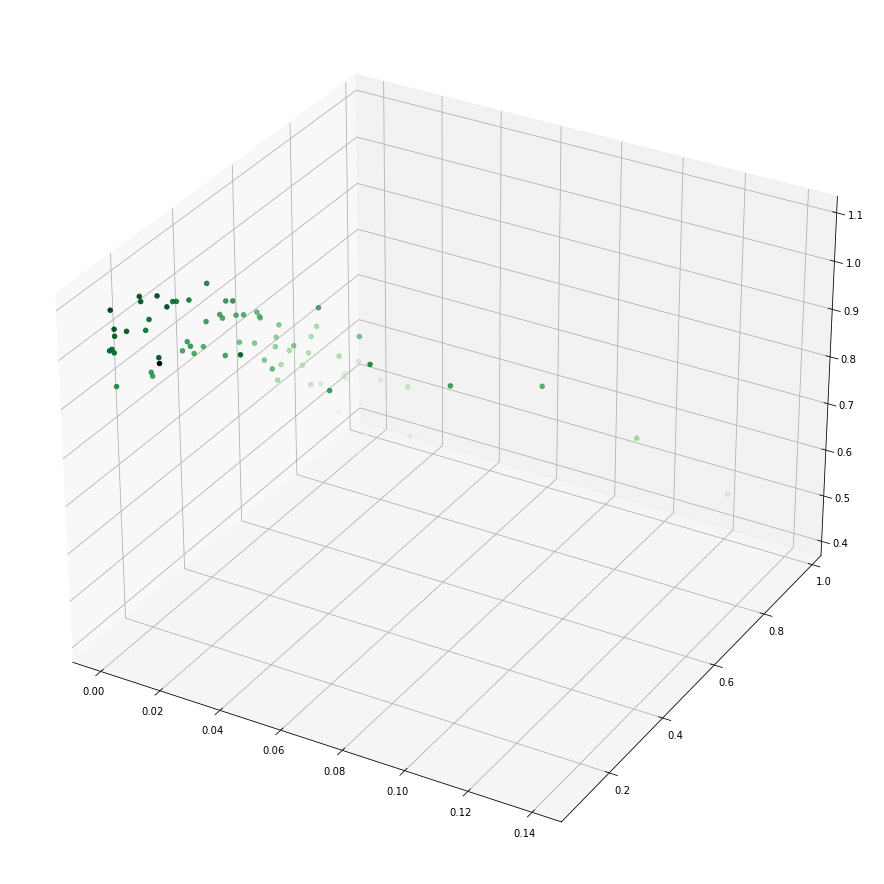

In [9]:
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection='3d')
xdata = data['x']
ydata = data['y']
zdata = data['z']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
final_x = final_data[:,0].cpu().numpy()
final_y = final_data[:,1].cpu().numpy()
final_pred = final_output.cpu().numpy()
ax.scatter3D(final_x, final_y, final_pred, c=final_pred, cmap='copper');

print (final_output, final_target)